# Lab 9: Clustering 

In this lab, you will gain more experience with clustering. In particular, you will learn how to use two of the most popular clustering algorithms: Hierarchical Clustering and K-Means Clustering. Then, you will be asked to apply this knowledge on a document data set.

## Lab 9.A: Clustering Tutorial with Questions (50% of grade)

Let us start by importing the needed libraries. We will use sklearn library, which implements many of the most popular data science algorithms. We will be using this library often for the rest of this course. Please, take a moment to look at the sklearn documentation at: http://scikit-learn.org/stable/.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from pandas import crosstab
from pandas.plotting import scatter_matrix
import pandas as pd
%matplotlib inline

Let us load the Iris data set and plot a scatter plot of the 2nd and 3rd attributes.

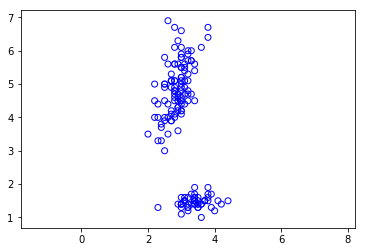

In [3]:
iris = datasets.load_iris()
d = iris.data
y = iris.target

plt.scatter(d[:,1],d[:,2],facecolors='none',color='blue')
plt.axis('equal');

## Hierarchical Clustering
Let us run the **hierarchical clustering** on the 2 columns of Iris. We will use only the first 20 rows. We'll call this new data set `dnew`.

In [4]:
A=range(0,20)
dnew = d[A,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'single', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 2, criterion='maxclust')

Let us now plot the dendrogram. 

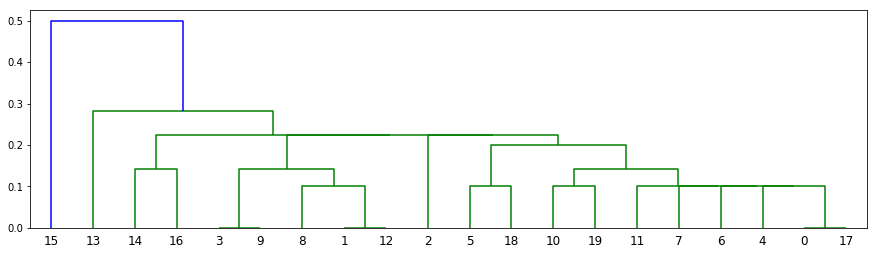

In [5]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

And, let us see the outcome of clustering

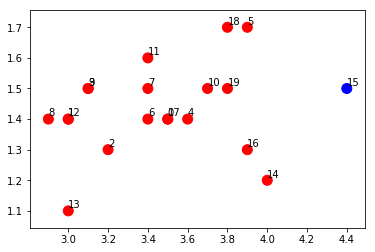

In [6]:
plt.figure()
colors=['red','blue']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

**Question 1**: Let us play with the clustering options
- Make 3 clusters. Discuss the result
- Use several different methods, other than 'single'. Try 'average' and one more of your choice. Discuss the result.
- Use a metric other than 'Eucliedean'. Discuss the result.

**Question 2**. Run the clustering on the whole Iris data set, using only 2nd and 3rd columns. Plot the results. Try to figure out which is the best number of clusters.

Each of the 150 flowers in Iris data set is labeled as one of 3 types of Irises. This information is in your variable `y`. Let us look at the cross-tabulation between the found clusters and the type of a flower:

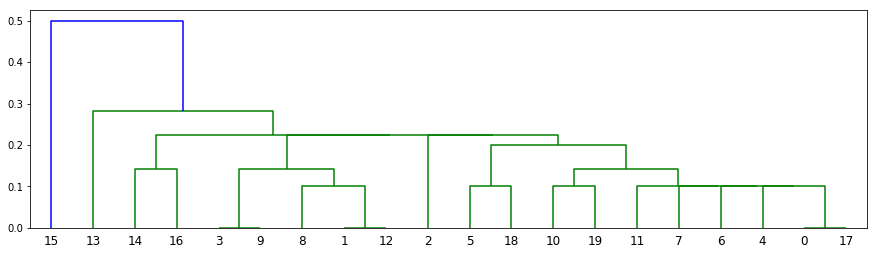

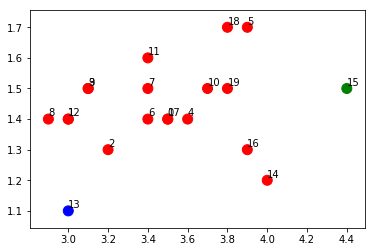

In [7]:
Z = hierarchy.linkage(dnew, method = 'single', metric = 'euclidean')
cl1 = hierarchy.fcluster(Z, 3, criterion = 'maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);
plt.figure()
colors = ['red', 'blue', 'green']
plt.scatter(dnew[A,0], dnew[A,1], c= cl1, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
for i in A:
    plt.text(dnew[i,0], dnew[i,1] + 0.01, s = str(i), size = 10)

Now that we have three clusters: 15 and 13 standing alone, and there are a lot of 'red'. Let's try method = 'average' and method = 'ward'

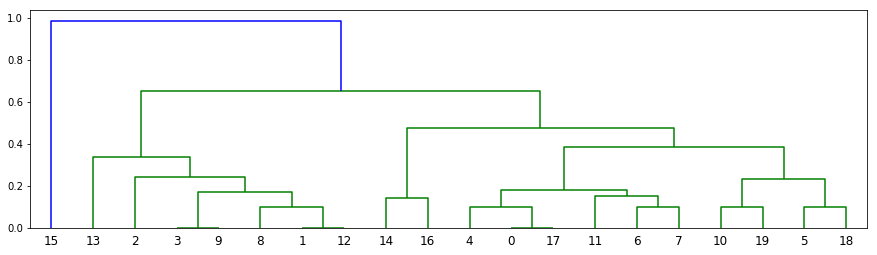

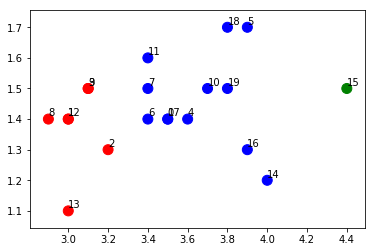

In [8]:
Z1 = hierarchy.linkage(dnew, method = 'average', metric = 'euclidean')
cl2 = hierarchy.fcluster(Z1,3,criterion = 'maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z1)
colors = ['red', 'blue', 'green']
plt.figure()
plt.scatter(dnew[A,0], dnew[A,1], c = cl2, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
for i in A:
    plt.text(dnew[i,0], dnew[i,1] + 0.01, s = str(i), size = 10)

there are now a lot of differences in this version of dendrogram and scatterplot. Although 15 is still standing alone, 13 now has some more 'friends'. Let's look at the Z1 and the Z matrix to explore what is happening

In [9]:
print (Z)
print (Z1)

[[ 0.         17.          0.          2.        ]
 [ 3.          9.          0.          2.        ]
 [ 1.         12.          0.          2.        ]
 [10.         19.          0.1         2.        ]
 [ 4.         20.          0.1         3.        ]
 [ 6.         24.          0.1         4.        ]
 [ 7.         25.          0.1         5.        ]
 [11.         26.          0.1         6.        ]
 [ 5.         18.          0.1         2.        ]
 [ 8.         22.          0.1         3.        ]
 [23.         27.          0.14142136  8.        ]
 [21.         29.          0.14142136  5.        ]
 [14.         16.          0.14142136  2.        ]
 [28.         30.          0.2        10.        ]
 [ 2.         33.          0.2236068  11.        ]
 [31.         34.          0.2236068  16.        ]
 [32.         35.          0.2236068  18.        ]
 [13.         36.          0.28284271 19.        ]
 [15.         37.          0.5        20.        ]]
[[ 0.         17.          0. 

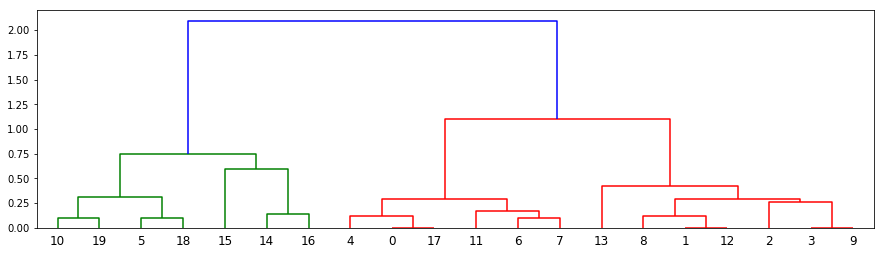

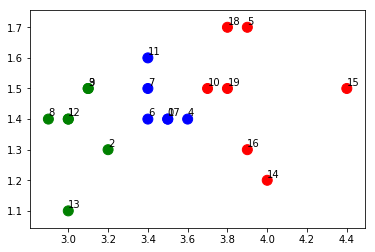

In [10]:
Z2 = hierarchy.linkage(dnew, method = 'ward', metric = 'euclidean')
cl3 = hierarchy.fcluster(Z2,3,criterion = 'maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z2)
colors = ['red', 'blue', 'green']
plt.figure()
plt.scatter(dnew[A,0], dnew[A,1], c = cl3, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
for i in A:
    plt.text(dnew[i,0], dnew[i,1] + 0.01, s = str(i), size = 10)

In [11]:
dnew = d[:,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

y    0   1   2
cl            
1   50   0   0
2    0   0  31
3    0  50  19


**Question 3**. Discuss the cross-tabulation result. Do you think clustering did a good job?

**Question 4**. Repeat the clustering, but this time find 3 clusters. Chack the cross-tabulate and discuss if you are happy with the result. Try with 4 and 5 clusters.

**Question 5**. Cross-tabulate results are useful for figuring out the quality of clustering. You task is to propose a formula that uses the result of cross-tabulation to come up with a single number that measures the success of clustering. Please jsutify why you selected the formula.

**Question 6**. Repeat the clustering on the original Iris data, which has 4 attributes. Plot the scatter plot of the resulting clustering (remember, you can pick to see only 2 of the dimensions). Alternativelly, do SVD to project your data to 2 dimensionas and again plot the scatter plot. Take a look at the cross-tabulation. Try different clustering parameters and try to find the best clustering. Decide which choice of the parameters gives you the best results. Report on your findings with justifications for your conclusion.

## K-Means Clustering

K-means clustering is another clustering algorithm (we will cover it in class tomorrow). It still receives a data set as an input, as well as the desired number of clusters, and outputs the assignment of data points to clusters.

Let us illustrate how to use k-means on the iris data.

In [ ]:
# the following command results in creating of 2 clusters of `dnew` data
kmeans = KMeans(n_clusters=5, random_state=0).fit(dnew)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure()
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))


**Question 7**. Discuss on the quality of outcome of k-means clustering

**Question 8**. Repeat k-means clustering, but this time change the nnumber of clusters to 3. Discuss the results. Compare the results with the results of hierarchical clustering from **Question 4**.

**Question 9**. Repeat k-means clustering on the whole Iris data set, the same as you did in **Question 6**. Discuss your results and compare them to the hierarchical clustering results.

## Lab 9.B Document Clustering (50% of grade)

In this part of the lab assignment, you will apply your clustering knowledge on the Newsgroup data. The following is a list of questions.

1. Select $N = 100$ random documents and their types from the newsgroup data. Use Google search to figure out how to do it in Python. The reason we are doing this is that hierrchical clustering can be very slow on large data sets.

2. Find 3 clusters using deafult (single-link, Eucliedan distance) hierarchical clustering. Use cross-tabulation to measure the quality of clustering.

3. Repeat step 2, by trying to find a better choice of parameters for hierarchical clustering. Try the Jaccard or cosine distance instead of Eucliedean. Report on your findings

4. Repeat step 3, but this type use k-means clustering. Compare with the results from step 3.

5. Instead of $N = 100$, select $N= 200, 500, 1000, 2000, 5000$ random documents. Set number of clusters to 5. Apply hierarchical and k-means clustering on such data and measure time. Discuss how does the time scale with $N$. For k-means clustering, discuss how do the clusters centers change as the data size increases -- do you see some qualitative improvements in the quality of clustering?

### Newsgoups data

Download `documents.csv`, `newsgroup.csv`, `groupnames.csv`, `wordlist.csv` to your local folder. This data set is about 16,242 news articles. Each article is represented as a bag-of-word vector containing counts of 100 words from a dictionary. This is saved in `documents`. The dictionary words are represented in the `wordlist`. Each document belongs to one of the 4 types of articles, listed in `groupnames`. We know the assignment of each document to one of those groups based on `newsgroup` values.

In [ ]:
wordlist = np.loadtxt('wordlist.csv', delimiter=",",dtype='str')
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",",dtype='str')

In [ ]:
print(wordlist.shape)
print(documents.shape)
print(groupnames)
print(newsgroup.shape)